# Quick graph creation

####  Libraries

In [3]:
import spacy
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

from spacy.tokens import Span 

import networkx as nx
from pyvis import network as net

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

2022-01-18 15:22:05.995813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-18 15:22:05.995851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/becode/.local/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
from IPython.core.display import display, HTML
g=net.Network(height='400px', width='50%',heading='')
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_edge(1,2)
g.add_edge(2,3)
g.show('example.html')
display(HTML('example.html'))

In [5]:
kg_df = pd.read_csv("../assets/rel-edges.csv")

In [6]:
kg_df.head(20 +1)

,source,relation,target
0,Borden Inc,said,Prince Co Inc
1,it,acquiring,Prince Co Inc
2,companies,producing,180 mln dlrs
3,Borden,said,have
4,companies,expected,sales
5,sales,totaling,230 mln dlrs
6,It,said,account
7,Prince,expected,for
8,brand,distributed,basis
9,sales,expected,285 mln dlrs


Next, we will use the networkx library to create a network from this dataframe. The nodes will represent the entities and the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, it is only from one node to another. For example, “John eats pasta”:

In [7]:
# create a directed-graph from a dataframe
def graph(kg_df):
    G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
    return G

In [8]:
G= graph(kg_df)

Let’s plot the network

In [9]:
def plot(G):
    plt.figure(figsize=(12,12))
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G,'relation')
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
    nx.draw_networkx_edge_labels(G, pos=pos)
    
    return plt.show()

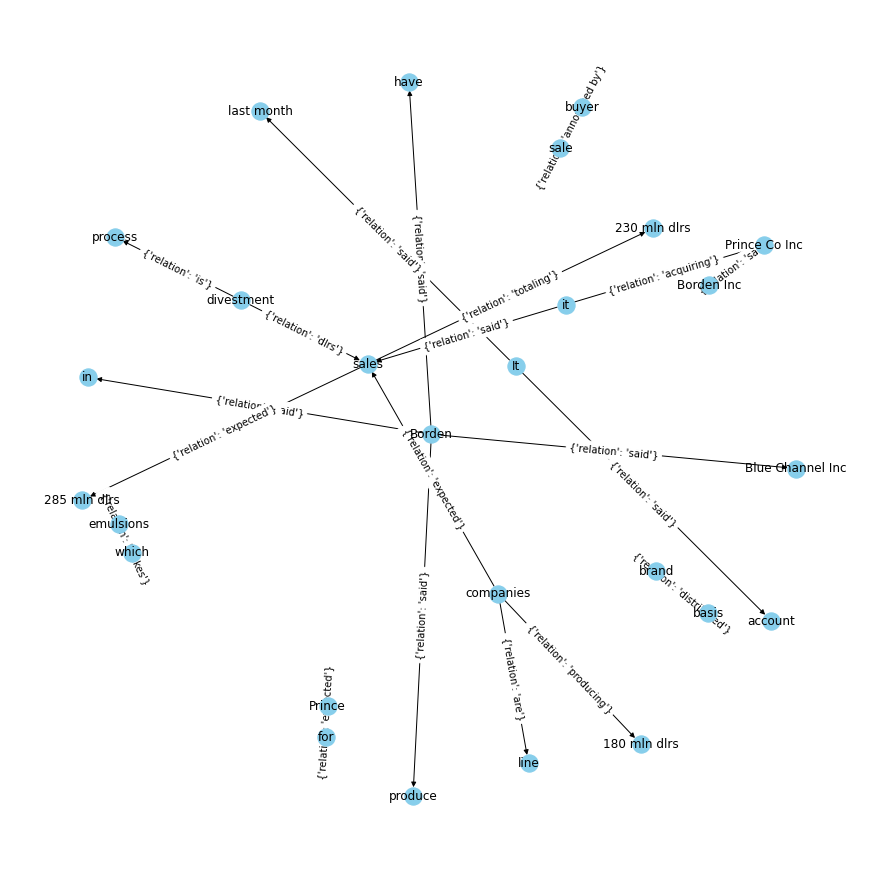

In [10]:
plot(G)

In [11]:
def interactive_graph(G):
    g4 = net.Network(height='400px', width='50%',notebook=True,heading='Graph :)')
    g4.from_nx(G)
    g4.show_buttons(filter_=['physics'])
    g4.show('graph.html')
    disp= display(HTML('graph.html'))
    
    return disp

In [12]:
interactive_graph(G)

jaal

In [13]:
pip install jaal

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
kg_df

,source,relation,target
0,Borden Inc,said,Prince Co Inc
1,it,acquiring,Prince Co Inc
2,companies,producing,180 mln dlrs
3,Borden,said,have
4,companies,expected,sales
5,sales,totaling,230 mln dlrs
6,It,said,account
7,Prince,expected,for
8,brand,distributed,basis
9,sales,expected,285 mln dlrs


/home/becode/.local/lib/python3.10/site-packages/dash_bootstrap_components/_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


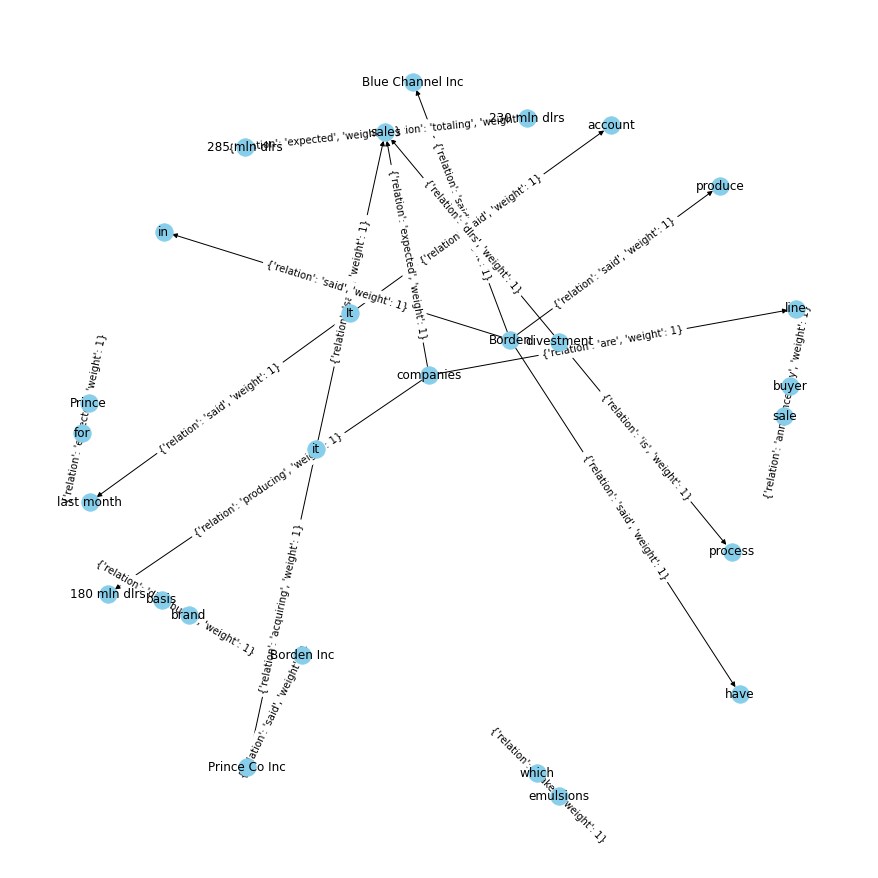

TypeError: cannot unpack non-iterable NoneType object

In [15]:
from jaal import Jaal
from jaal.datasets import load_got

#load the data

edge_df, node_df = plot(G)

# add edge labels
edge_df.loc[:, 'source'] = edge_df.loc[:, 'target'].astype(str)
Jaal(edge_df, node_df).plot(directed=True)
node_df.head()

Well, this is not exactly what we were hoping for (still looks quite a sight though!).

It turns out that we have created a graph with all the relations that we had. It becomes really hard to visualize a graph with these many relations or predicates.

So, it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. Let’s start with the relation “composed by”

Ignore this code:

In [13]:
#G=nx.from_pandas_edgelist(kg_df[kg_df['relation']=="decides"], "source", "target", 
#                          edge_attr=True, create_using=nx.MultiDiGraph())
#
#plt.figure(figsize=(12,12))
#pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
#nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
#plt.show()